In [5]:
import pandas as pd
import os

# set main path
main_path = "/home/local/PSYCH-ADS/xuqian_chen/Github/agebias-chi"

tmp_folder_path = os.path.join(main_path, '2_pipeline/tmp')
out_folder_path = os.path.join(main_path, '2_pipeline/out')

df = pd.read_csv(os.path.join(out_folder_path, 'merged.csv'))
df

GDP per capita  year     tight     loose      indi      coll  \
0          799.000  1950  0.002368  0.001413  0.000211  0.000969   
1          950.000  1951  0.002378  0.001369  0.000195  0.000848   
2         1047.000  1952  0.002267  0.001430  0.000191  0.000852   
3         1157.000  1953  0.002150  0.001471  0.000205  0.000830   
4         1049.000  1954  0.001993  0.001611  0.000205  0.000825   
..             ...   ...       ...       ...       ...       ...   
67       12733.932  2017  0.001599  0.002189  0.001363  0.000678   
68       13101.706  2018  0.001547  0.002217  0.001330  0.000702   
69             NaN  2019       NaN       NaN       NaN       NaN   
70             NaN  2020       NaN       NaN       NaN       NaN   
71             NaN  2021       NaN       NaN       NaN       NaN   

    old_care_vir  young_care_vir  old_care_vic  young_care_vic  ...  \
0      -0.014116        0.122747      0.490819        0.300240  ...   
1      -0.059350        0.132332      0.546312        0.437519  ...   
2       0.060573        0.153942      0.442140        0.185309  ...   
3      -0.004270        0.178073      0.432042        0.215920  ...   
4      -0.049671        0.149778      0.488344        0.297164  ...   
..           ...             ...           ...             ...  ...   
67     -0.056290        0.138074      0.370831        0.197294  ...   
68     -0.114645        0.109938      0.313647        0.143832  ...   
69     -0.093822        0.064017      0.275404        0.084616  ...   
70     -0.069210        0.126692      0.157920       -0.008467  ...   
71     -0.117886        0.044220      0.247643        0.005737  ...   

    old_negative  young_negative  old_competent  young_competent  old_warm  \
0       0.283427        0.277293      -0.005692         0.190147  0.331628   
1       0.310765        0.346320      -0.003780         0.275571  0.304497   
2       0.211504        0.176336       0.029387         0.247616  0.315040   
3       0.317817        0.221325      -0.034131         0.264433  0.326711   
4       0.434556        0.302012      -0.002921         0.295589  0.269320   
..           ...             ...            ...              ...       ...   
67      0.536486        0.381698       0.012422         0.302963  0.428604   
68      0.561080        0.337180       0.033879         0.333678  0.416275   
69      0.405143        0.222729      -0.028266         0.298694  0.335756   
70      0.432104        0.287049      -0.019647         0.265716  0.427964   
71      0.436583        0.185964       0.017172         0.272723  0.416964   

    young_warm  old_incompetent  young_incompetent  old_unwarm  young_unwarm  
0     0.465013         0.196793           0.066242    0.229005      0.178330  
1     0.455284         0.168652           0.162052    0.197948      0.214290  
2     0.405069         0.056003          -0.033953    0.108154      0.045064  
3     0.473586         0.076872          -0.003071    0.194696      0.127003  
4     0.422039         0.242175           0.128720    0.234713      0.172424  
..         ...              ...                ...         ...           ...  
67    0.538502         0.371148           0.208558    0.523790      0.294616  
68    0.517361         0.412938           0.210562    0.486486      0.217150  
69    0.463454         0.312489           0.114735    0.308707      0.139282  
70    0.546488         0.337794           0.155973    0.290538      0.151681  
71    0.508574         0.432632           0.128362    0.301822      0.098629  

[72 rows x 52 columns]

In [14]:
df.columns

Index(['GDP per capita', 'year', 'tight', 'loose', 'indi', 'coll',
       'old_care_vir', 'young_care_vir', 'old_care_vic', 'young_care_vic',
       'old_fare_vir', 'young_fare_vir', 'old_fare_vic', 'young_fare_vic',
       'old_loya_vir', 'young_loya_vir', 'old_loya_vic', 'young_loya_vic',
       'old_auth_vir', 'young_auth_vir', 'old_auth_vic', 'young_auth_vic',
       'old_sanc_vir', 'young_sanc_vir', 'old_sanc_vic', 'young_sanc_vic',
       'old_care', 'old_fare', 'old_loya', 'old_auth', 'old_sanc',
       'old_virtue', 'old_vice', 'young_care', 'young_fare', 'young_loya',
       'young_auth', 'young_sanc', 'young_virtue', 'young_vice',
       'old_positive', 'young_positive', 'old_negative', 'young_negative',
       'old_competent', 'young_competent', 'old_warm', 'young_warm',
       'old_incompetent', 'young_incompetent', 'old_unwarm', 'young_unwarm',
       'care_vir_bias', 'care_vic_bias', 'negative_bias', 'competent_bias',
       'warm_bias', 'incompetent_bias', 'unwarm_bias']

# Visulization

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
bias_columns = ['positive', 'negative']
for col in bias_columns:
    df[col+'_bias'] = df['old_'+col] - df['young_'+col]
plt.figure(figsize=(14, 7))
for col in bias_columns:
    plt.plot(df['year'], df[col+'_bias'], label=col)
plt.xlabel('Year')
plt.ylabel('Bias (Old - Young)')
plt.title('Age Bias across Different Domains Over Time')
plt.legend()
plt.show()


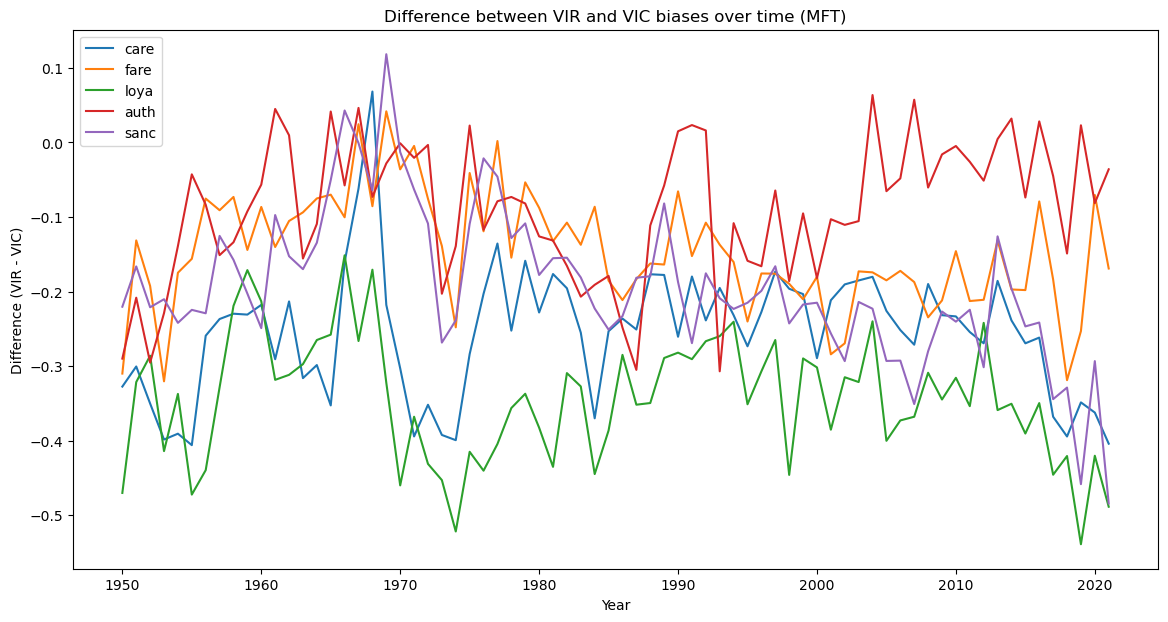

In [19]:
mft_columns = ['care', 'fare', 'loya', 'auth', 'sanc']


# MFT columns have '_vir' and '_vic' versions, we'll calculate biases for all
for col in mft_columns:
    for suffix in ['_vir', '_vic']:
        df[col+suffix+'_bias'] = df['old_'+col+suffix] - df['young_'+col+suffix]

# Calculate averages for vir and vic
df['vir_bias'] = df[[col+'_vir_bias' for col in mft_columns]].mean(axis=1)
df['vic_bias'] = df[[col+'_vic_bias' for col in mft_columns]].mean(axis=1)

# Plot the averages
plt.figure(figsize=(14, 7))
plt.plot(df['year'], df['vir_bias'], label='Virtue')
plt.plot(df['year'], df['vic_bias'], label='Vice')
plt.xlabel('Year')
plt.ylabel('Bias (Old - Young)')
plt.title('Average Bias across Different Domains Over Time (MFT)')
plt.legend()
plt.show()

# Plot the individual domains   
plt.figure(figsize=(14, 7))
for col in mft_columns:
    for suffix in ['_vir', '_vic']:
        plt.plot(df['year'], df[col+suffix+'_bias'], label=col+suffix)
plt.xlabel('Year')
plt.ylabel('Bias (Old - Young)')
plt.title('Age Bias across Different Domains Over Time (Moral Foundation Theory)')
plt.legend()
plt.show()

# Calculate the difference between 'vir' and 'vic' for each domain
for domain in mft_columns:
    df[domain+'_vir_vic_diff_bias'] = df[domain+'_vir_bias'] - df[domain+'_vic_bias']


# Plot the difference
plt.figure(figsize=(14, 7))
for domain in mft_columns:
    plt.plot(df['year'], df[domain+'_vir_vic_diff'], label=domain)
plt.xlabel('Year')
plt.ylabel('Difference (VIR - VIC)')
plt.title('Difference between VIR and VIC biases over time (MFT)')
plt.legend()
plt.show()

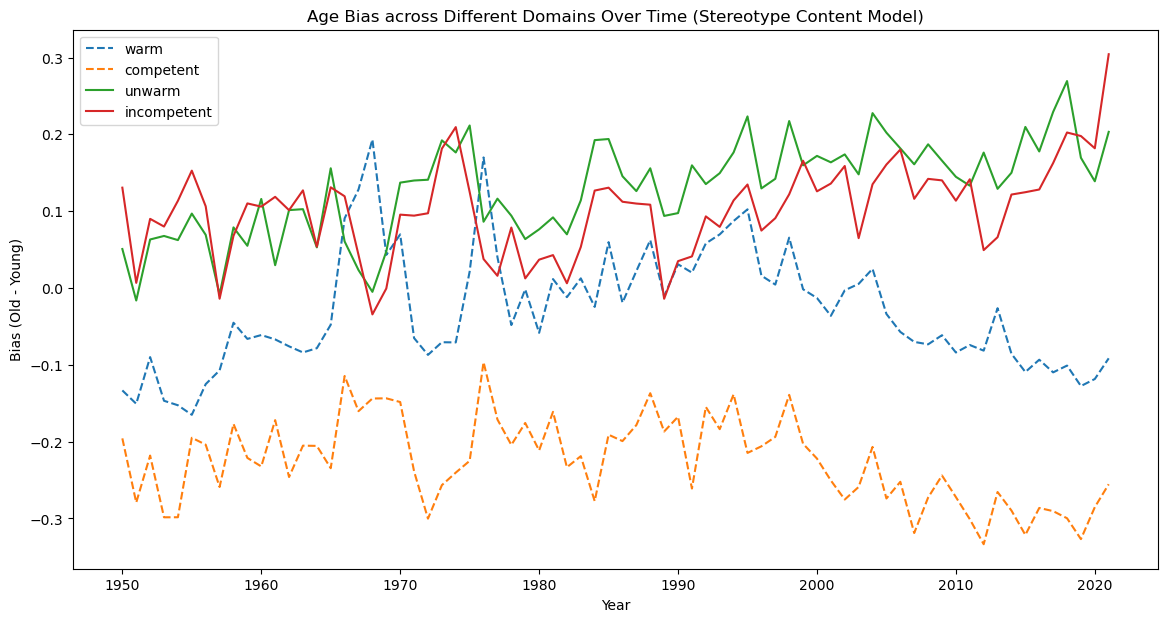

In [10]:
scm_columns = ['warm', 'competent', 'unwarm', 'incompetent']
for col in scm_columns:
    df[col+'_bias'] = df['old_'+col] - df['young_'+col]

# Plot the SCM columns
plt.figure(figsize=(14, 7))
for col in scm_columns:
    if col in ['warm', 'competent']:
        plt.plot(df['year'], df[col+'_bias'], label=col, linestyle='--') # Dashed line for 'warm' and 'competent'
    else:
        plt.plot(df['year'], df[col+'_bias'], label=col) # Normal line for the others
plt.xlabel('Year')
plt.ylabel('Bias (Old - Young)')
plt.title('Age Bias across Different Domains Over Time (Stereotype Content Model)')
plt.legend()
plt.show()

plt.show()

# [in progress] Bayesian Change Point Detection

In [2]:
import ruptures as rpt
import numpy as np


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Top 10 change points for care_vir_bias:
1. Change point: 72


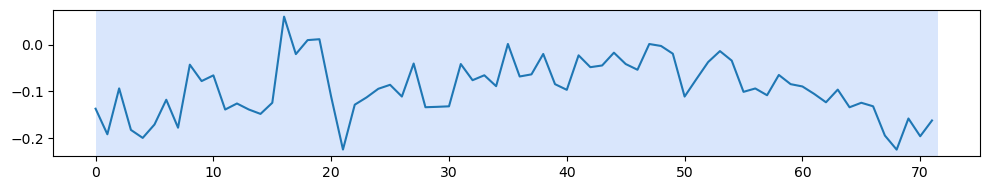

Top 10 change points for care_vic_bias:
1. Change point: 72


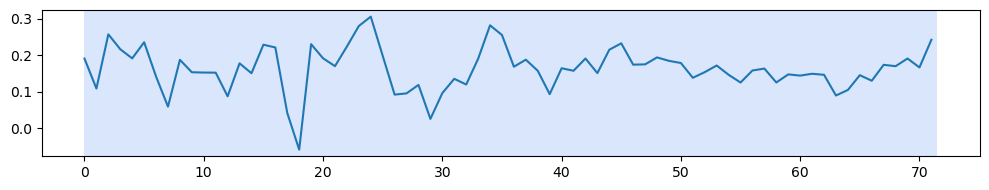

Top 10 change points for care_vir_vic_diff_bias:
1. Change point: 72


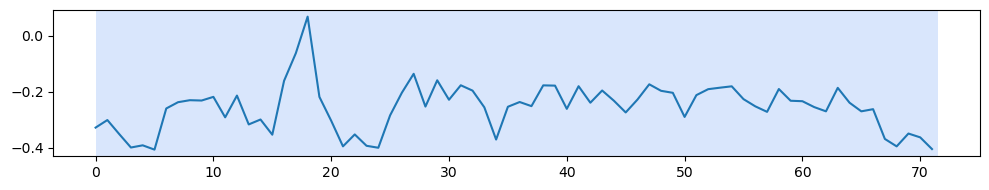

Top 10 change points for fare_vir_bias:
1. Change point: 72


Top 10 change points for fare_vic_bias:
1. Change point: 72


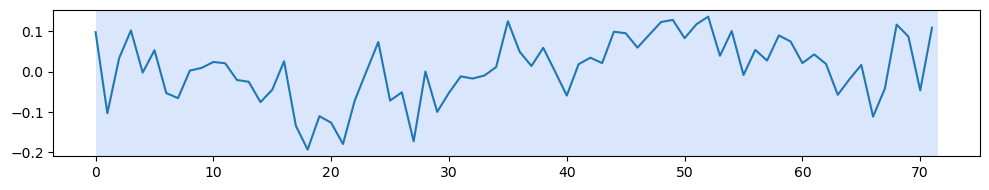

Top 10 change points for fare_vir_vic_diff_bias:
1. Change point: 72


Top 10 change points for loya_vir_bias:
1. Change point: 72


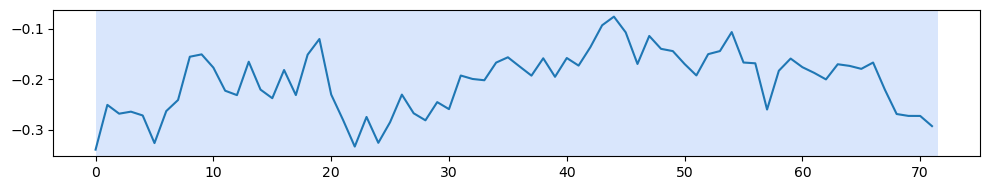

Top 10 change points for loya_vic_bias:
1. Change point: 72


Top 10 change points for loya_vir_vic_diff_bias:
1. Change point: 72


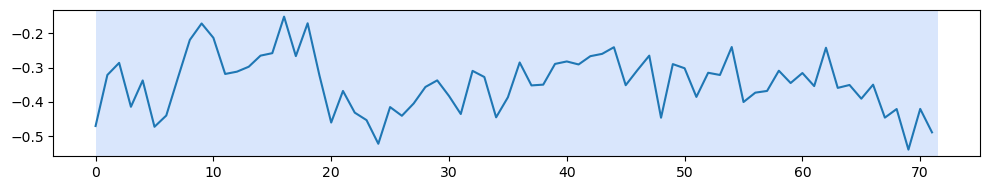

Top 10 change points for auth_vir_bias:
1. Change point: 72


Top 10 change points for auth_vic_bias:
1. Change point: 72


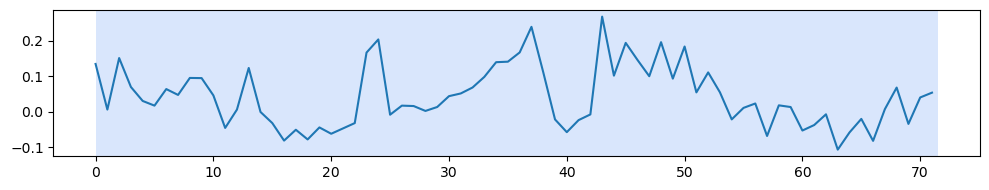

Top 10 change points for auth_vir_vic_diff_bias:
1. Change point: 72


Top 10 change points for sanc_vir_bias:
1. Change point: 72


Top 10 change points for sanc_vic_bias:
1. Change point: 72


Top 10 change points for sanc_vir_vic_diff_bias:
1. Change point: 72


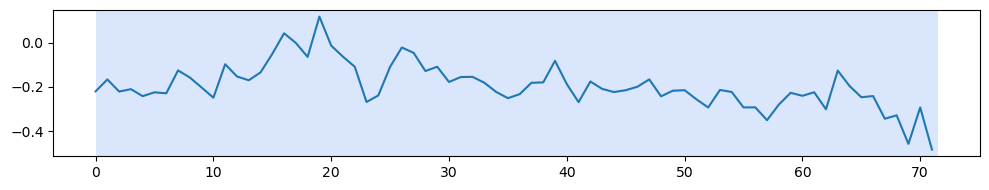

Top 10 change points for warm_bias:
1. Change point: 72


Top 10 change points for competent_bias:
1. Change point: 72


Top 10 change points for unwarm_bias:
1. Change point: 72


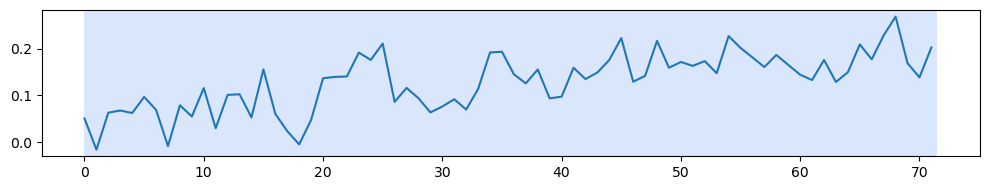

Top 10 change points for incompetent_bias:
1. Change point: 72


In [24]:
import matplotlib.pyplot as plt
import ruptures as rpt

def bayesian_change_point_detection(column_name):
    # Prepare the data
    data = df[column_name].values

    # Define the change point detection method
    algo = rpt.Pelt(model="l2").fit(data)

    # Predict the change points - number of change points can be adjusted here
    result = algo.predict(pen=1)

    # Print the top 10 change points
    print(f"Top 10 change points for {column_name}:")
    i=0
    for i, point in enumerate(sorted(result)[:10]):
        print(f"{i+1}. Change point: {point}")

    # display
    rpt.display(data, result, result)
    plt.show()

df = df[df['year'] != 2022]

# Run the function on MFT and SCM columns
mft_domains = ['care', 'fare', 'loya', 'auth', 'sanc']
suffixes = ['_vir', '_vic', '_vir_vic_diff']
scm_columns = ['warm', 'competent', 'unwarm', 'incompetent']

for domain in mft_domains:
    for suffix in suffixes:

        bayesian_change_point_detection(domain+suffix+'_bias')

for col in scm_columns:

    bayesian_change_point_detection(col+'_bias')


# ARIMA

In [ ]:
# !pip install pmdarima


In [26]:
import pmdarima as pm

# Fit auto_arima function to the data
model = pm.auto_arima(df['positive_bias'], 
                      start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-232.890, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-226.741, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-231.845, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-233.728, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-228.740, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-232.460, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-230.851, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-235.721, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-234.880, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-234.451, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-233.843, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-232.987, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.467 seconds
                               SARIMAX Results                                
Dep. Vari